In [21]:
import numpy as np
from math import pi
from numpy import cos, sin, rad2deg
from skimage import io, data
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel, sobel_h, sobel_v
from skimage.feature import canny,corner_harris, corner_peaks
from skimage.transform import hough_line, hough_line_peaks
# from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis
from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis, colorbar, clim




import time

In [22]:
def erosion(img):
    img2 = np.zeros_like(img)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            if img[i, j] == 1:
                if img[i-1, j-1] == 1 and img[i-1, j] == 1 and img[i-1, j+1] == 1 and img[i, j-1] == 1 and img[i, j+1] == 1 and img[i+1, j-1] == 1 and img[i+1, j] == 1 and img[i+1, j+1] == 1:
                    img2[i, j] = 1
    return img2


In [23]:
def dilation(img):
    img2 = np.zeros_like(img)
    for i in range(1,img.shape[0]-1):
        for j in range(1,img.shape[1]-1):
            if img[i,j] == 1:
                img2[i-1,j-1] = 1
                img2[i-1,j] = 1
                img2[i-1,j+1] = 1
                img2[i,j-1] = 1
                img2[i,j+1] = 1
                img2[i+1,j-1] = 1
                img2[i+1,j] = 1
                img2[i+1,j+1] = 1
                img2[i,j] = 1
    return img2

In [24]:
def binImg(img):
    img2 = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > 0.4:
                img2[i,j] = 1
    return img2

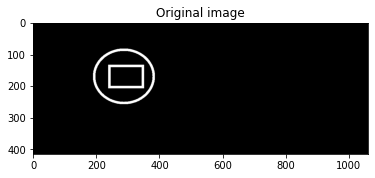

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
img = imread("proj4.png")

# np.delete(img, 0, 2)
img = rgb2gray(img)
# img = binImg(img)
figure
imshow(img, cmap="gray")
title("Original image")
show()
img

(400, 300)


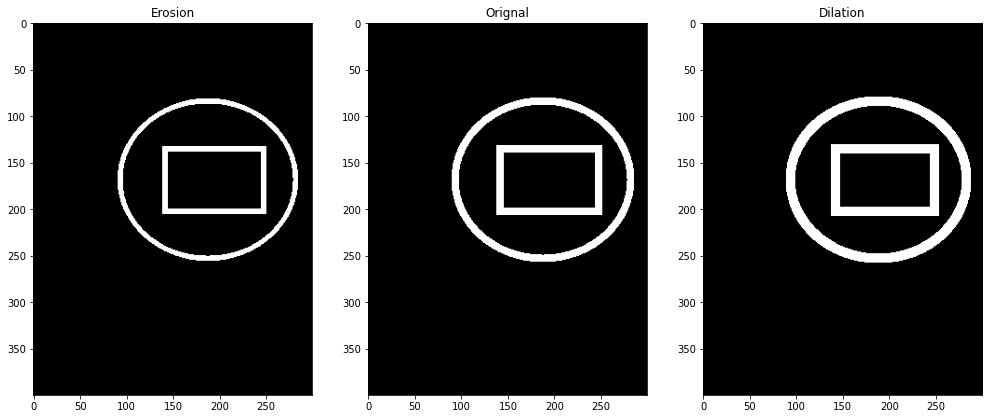

In [26]:

figure(figsize=(17,15))
img = img[:400,100 :400]
print(img.shape)
subplot(1,3,2)
imshow(img, cmap="gray")
title("Orignal")
# figure(figsize=(17,10))

subplot(1,3,1)
imshow(erosion(img), cmap="gray")
title("Erosion")
subplot(1,3,3)
imshow(dilation(img), cmap="gray")
title("Dilation")
show()


In [18]:
def opening(img):
    return dilation(erosion(img)) 
def closing(img):
    return erosion(dilation(img))

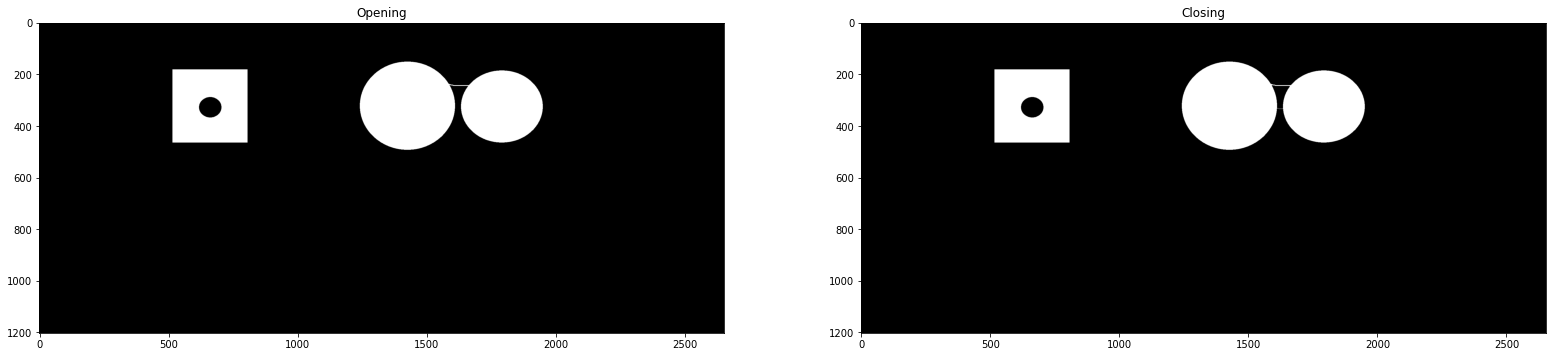

In [19]:
img = imread('morpho.png')
img = rgb2gray(img)
img = binImg(img)
figure(figsize=(27,15))
subplot(2,2,1)
imshow(opening(img.copy()), cmap="gray")
title("Opening")
subplot(2,2,2)
imshow(closing(img.copy()), cmap="gray")
title("Closing")
show()

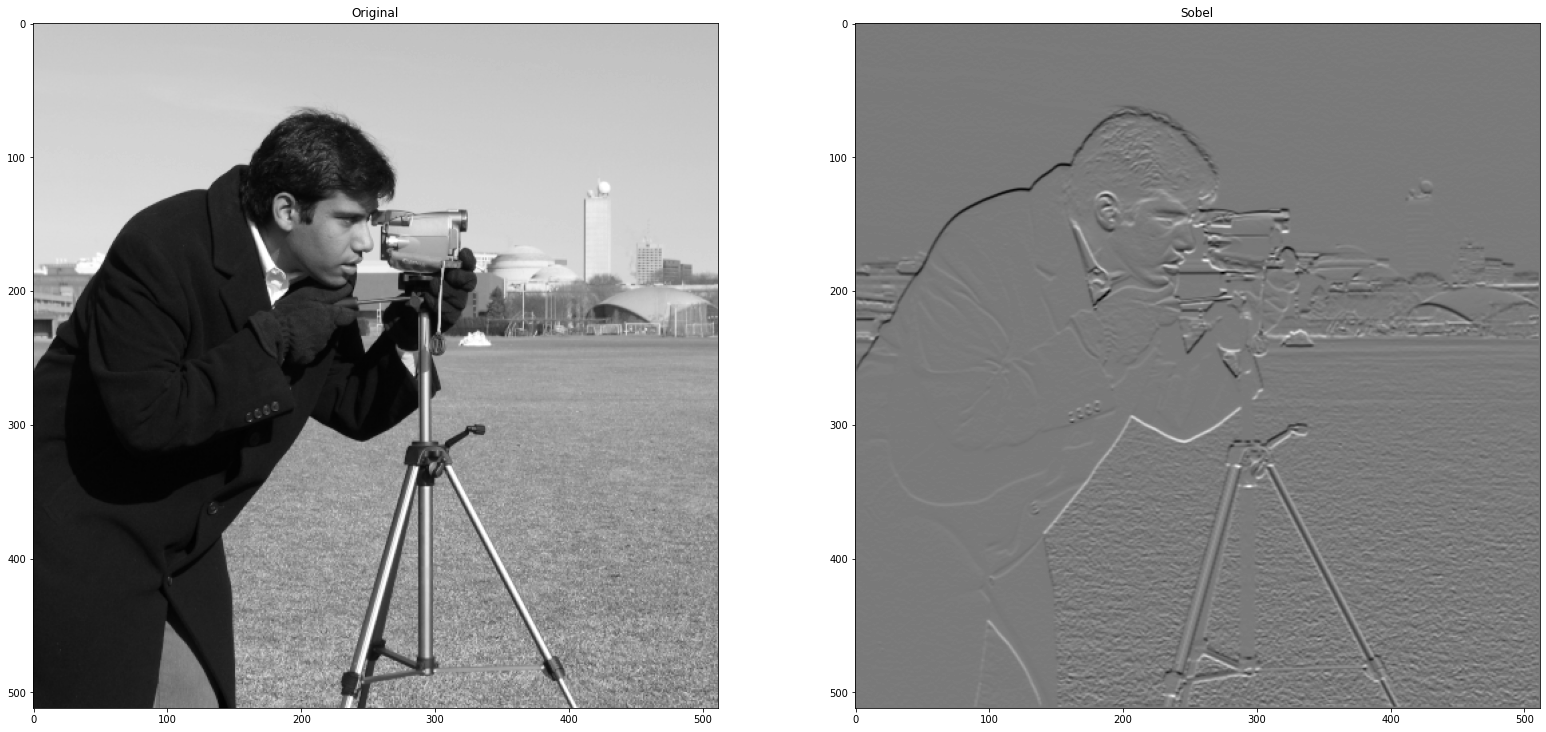

In [20]:
img = data.camera()
mask = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
m = img.shape[0]
n = img.shape[1]
res = np.zeros([m,n])
for i in range(1,m-1):
    for j in range(1,n-1):
        temp = img[i-1][j-1]*mask[0][0] + img[i-1][j]*mask[0][1] + img[i-1][j+1]*mask[0][2] + img[i][j-1]*mask[1][0] + img[i][j]*mask[1][1] + img[i][j+1]*mask[1][2] + img[i+1][j-1]*mask[2][0] + img[i+1][j]*mask[2][1] + img[i+1][j+1]*mask[2][2]
        res[i][j] = temp
figure(figsize=(27,15))
subplot(1,2,1)
imshow(img, cmap="gray")
title("Original")
subplot(1,2,2)
imshow(res, cmap="gray")
title("Sobel")
show()